In [179]:
import pickle
import h5py
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [191]:
filenum=18
CAT = f'/Volumes/CAMELSDrive/Illustris_SUBFIND/LH{filenum}_SUBFIND.hdf5'
# open 
f = h5py.File(CAT, 'r')

pos_sh  = f['Subhalo/SubhaloPos'][:]/1e3     #positions of SUBFIND subhalos in Mpc/h
SFR_sh = f['Subhalo/SubhaloSFRinMaxRad'][:]
subh_M_R_12 = f['Subhalo/SubhaloMassInRadType'][:,4]*1e10 # total stellar mass of twice the stellare alf-mass radius in Msun/h
nstar_sh = f['Subhalo/SubhaloLenType'][:,4]
photo_sh = f['Subhalo/SubhaloStellarPhotometrics'][:]
# close file
f.close()

fits_file_path = f'LH_ellipticities/CAMELS_data_LH{filenum}.fits'

with fits.open(fits_file_path) as hdul:
    data = hdul[1].data

# Now you can use the same variable names
pos_g = np.array([data['x'], data['y'], data['z']]).T
print(pos_sh.shape, pos_g.shape, photo_sh.shape)
print(photo_sh[:100,4] - photo_sh[:100,5])

(13534, 3) (242, 3) (13534, 8)
[ 0.55015373  0.258152    0.2851858   0.          0.46366787  0.41698837
  0.42076492  0.7426224   0.4603567   0.5117321  -0.01558113  0.33448124
  0.5147753   0.5218401   0.7501335   0.5081444   0.7338486   0.7768192
 -0.05421257  0.          0.          0.          0.44130325  0.6817093
  0.         -0.02719498  0.          0.          0.          0.
  0.71414185  0.640028    0.47516632  0.          0.6657047   0.
  0.          0.          0.08453751  0.          0.          0.18514442
  0.          0.71102524  0.6285763   0.          0.7065067   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.49645042
  0.6500349   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.48460007  0.26997948  0.41070747  0.4653778  -0.10649109
  0.4343052   0.61336136  0.40465164 -0.11241722  0.54046726  0.
  0.4

In [21]:
# Use broadcasting to compare all elements
indices = np.where((pos_sh[:, None] == pos_g).all(axis=2).any(axis=1))[0]
consistent = pos_g.shape[0]==indices.shape[0]
print(indices.shape[0],"=",pos_g.shape[0]," ",consistent)

242 = 242   True


In [22]:
if consistent:
    print(len(SFR_sh[indices]))
    print(sum(SFR_sh[indices]>0.1))

242
139


In [290]:
xyz = [[1,2], [2,0], [0,1]]
mean_SFR = np.array([])
mean_e = np.array([])
filt_g_r = np.array([])
all_g_r = np.array([])
std_e = np.array([])
all_SFR = np.array([])
all_M_R_12 = np.array([])
all_nstar = np.array([])
all_gas = np.array([])
filt_SFR = np.array([])
filt_M_R_12 = np.array([])
filt_nstar = np.array([])
filt_gas = np.array([])
mean_SSFR = np.array([])
for filenum in range(0,1000):
    CAT = f'/Volumes/CAMELSDrive/Illustris_SUBFIND/LH{filenum}_SUBFIND.hdf5'
    # open 
    f = h5py.File(CAT, 'r')

    pos_sh  = f['Subhalo/SubhaloPos'][:]/1e3     #positions of SUBFIND subhalos in Mpc/h
    SFR_sh = f['Subhalo/SubhaloSFR'][:]
    subh_M_R_12 = f['Subhalo/SubhaloMassInRadType'][:,4]*1e10
    nstar_sh = f['Subhalo/SubhaloLenType'][:,4]
    ngas_sh = f['Subhalo/SubhaloLenType'][:,0]
    photo_sh = f['Subhalo/SubhaloStellarPhotometrics'][:]
    # close file
    f.close()

    fits_file_path = f'LH_ellipticities/CAMELS_data_LH{filenum}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data
#     pos_sh = np.array([pos_sh[:,2],pos_sh[:,0],pos_sh[:,1]]).T
    # Now you can use the same variable names
    pos_g = np.array([data['x'], data['y'], data['z']]).T
    ias = np.array([data['ia_1'], data['ia_2']]).T
#     print(pos_sh.shape, pos_g.shape)

    indices = np.where((pos_sh[:, None] == pos_g).all(axis=2).any(axis=1))[0]
    consistent = pos_g.shape[0]==indices.shape[0]
#     print(pos_g[:2], pos_sh[:2])
    print(indices.shape[0],"=",pos_g.shape[0]," ",consistent)
    # filter out elliptical
    if consistent:
        g_r = (photo_sh[:,4] - photo_sh[:,5])
        filt_g_r = np.append(filt_g_r, g_r[indices])
        all_g_r = np.append(all_g_r, g_r)
#         print(len(SFR_sh[indices]))
#         print(sum(SFR_sh[indices]>0.1))
        all_SFR = np.append(all_SFR,SFR_sh)
        filt_SFR = np.append(filt_SFR,SFR_sh[indices])
        all_M_R_12 = np.append(all_M_R_12, subh_M_R_12)
        filt_M_R_12 = np.append(filt_M_R_12, subh_M_R_12[indices])
#         all_nstar = np.append(all_nstar, nstar_sh)
#         filt_nstar = np.append(filt_nstar, nstar_sh[indices])
#         all_gas = np.append(all_gas, ngas_sh)
#         filt_gas = np.append(filt_gas, ngas_sh[indices])
        mean_SFR = np.append(mean_SFR, np.mean(SFR_sh[indices]))
        mean_SSFR = np.append(mean_SSFR, np.mean(SFR_sh[indices]/subh_M_R_12[indices]))
        e = np.sqrt(ias[:,0]**2+ias[:,0]**2)
        mean_e = np.append(mean_e, np.mean(e))
        std_e = np.append(std_e, np.std(e))
    else:
        print('Not consistent')


409 = 409   True
348 = 348   True
1170 = 1170   True
349 = 349   True
358 = 358   True
483 = 483   True
517 = 517   True
697 = 697   True
1787 = 1787   True
1518 = 1518   True
1532 = 1532   True
384 = 384   True
621 = 621   True
1298 = 1298   True
376 = 376   True
672 = 672   True
397 = 397   True
138 = 138   True
242 = 242   True
783 = 783   True
1137 = 1137   True
1675 = 1675   True
658 = 658   True
485 = 485   True
964 = 964   True
382 = 382   True
654 = 654   True
858 = 858   True
1790 = 1790   True
721 = 721   True
352 = 352   True
415 = 415   True
1639 = 1639   True
357 = 357   True
753 = 753   True
1191 = 1191   True
697 = 697   True
509 = 509   True
483 = 483   True
280 = 280   True
255 = 255   True
1400 = 1400   True
499 = 499   True
141 = 141   True
386 = 386   True
322 = 322   True
708 = 708   True
1037 = 1037   True
1297 = 1297   True
829 = 829   True
1263 = 1263   True
218 = 218   True
278 = 278   True
903 = 903   True
926 = 926   True
940 = 940   True
483 = 483   True
255

625 = 625   True
401 = 401   True
1092 = 1092   True
889 = 889   True
442 = 442   True
509 = 509   True
535 = 535   True
1628 = 1628   True
940 = 940   True
687 = 687   True
1377 = 1377   True
1563 = 1563   True
884 = 884   True
197 = 197   True
315 = 315   True
1034 = 1034   True
1481 = 1481   True
576 = 576   True
1078 = 1078   True
1170 = 1170   True
1019 = 1019   True
822 = 822   True
792 = 792   True
964 = 964   True
1525 = 1525   True
588 = 588   True
1225 = 1225   True
1402 = 1402   True
637 = 637   True
912 = 912   True
353 = 353   True
326 = 326   True
354 = 354   True
1910 = 1910   True
349 = 349   True
415 = 415   True
1781 = 1781   True
411 = 411   True
495 = 495   True
178 = 178   True
1283 = 1283   True
210 = 210   True
251 = 251   True
1422 = 1422   True
539 = 539   True
466 = 466   True
478 = 478   True
433 = 433   True
658 = 658   True
379 = 379   True
460 = 460   True
1091 = 1091   True
1011 = 1011   True
1154 = 1154   True
566 = 566   True
598 = 598   True
777 = 777 

674 = 674   True
290 = 290   True
896 = 896   True
676 = 676   True
416 = 416   True
596 = 596   True
1577 = 1577   True
1084 = 1084   True
492 = 492   True
341 = 341   True
726 = 726   True
1002 = 1002   True
451 = 451   True
505 = 505   True
1868 = 1868   True
656 = 656   True
569 = 569   True
1033 = 1033   True
1030 = 1030   True
326 = 326   True
632 = 632   True
465 = 465   True
1535 = 1535   True
1043 = 1043   True
753 = 753   True
240 = 240   True
2052 = 2052   True
394 = 394   True
707 = 707   True
1536 = 1536   True
1231 = 1231   True
669 = 669   True
430 = 430   True
481 = 481   True
1040 = 1040   True
337 = 337   True
993 = 993   True
603 = 603   True
1057 = 1057   True
594 = 594   True
1146 = 1146   True
399 = 399   True
226 = 226   True
492 = 492   True
1127 = 1127   True
692 = 692   True
439 = 439   True
597 = 597   True
1728 = 1728   True
299 = 299   True
601 = 601   True
1447 = 1447   True
481 = 481   True
322 = 322   True
1036 = 1036   True
1276 = 1276   True
474 = 474 

In [36]:
label_table = np.loadtxt("../test-dependence-folder/CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))
for i in range(label_table.shape[1]):
    if i>1:
        label_table[:,i] = np.log(label_table[:,i])
print(mean_SFR.shape, label_table.shape)

(1000,) (1000, 6)


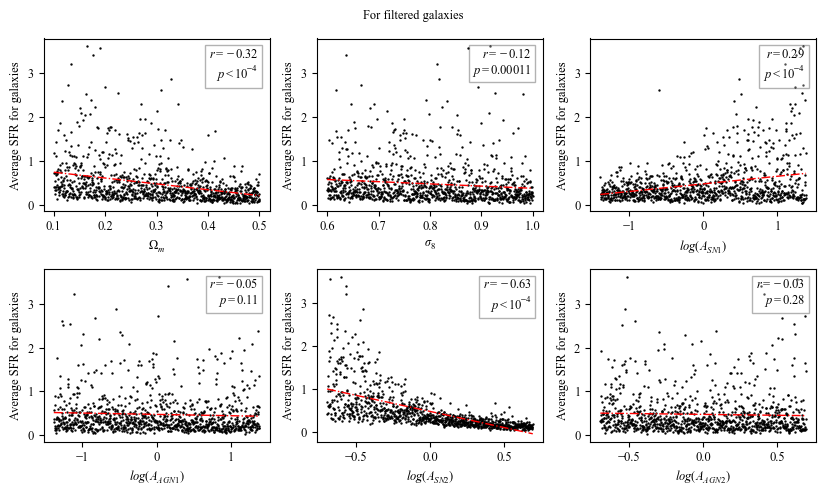

In [203]:
from scipy.stats import pearsonr
simpars = ['\Omega_m','\sigma_8','log(A_{SN1})','log(A_{AGN1})','log(A_{SN2})','log(A_{AGN2})']
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))
axes = axes.flatten()
fig.suptitle('For filtered galaxies')
for i, param in enumerate(range(6)):
    ax = axes[i]
    
    slope, intercept = np.polyfit(label_table[:,param], mean_SFR, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    pearson_coeff, p_value = pearsonr(label_table[:,param], mean_SFR)
    

    ax.scatter(label_table[:,param], mean_SFR, c='k', s=0.5)
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.set_xlabel(f'${simpars[param]}$')
    ax.set_ylabel(f'Average SFR for galaxies')
    
plt.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/avg SFR vs params.pdf', dpi=300)
plt.show()

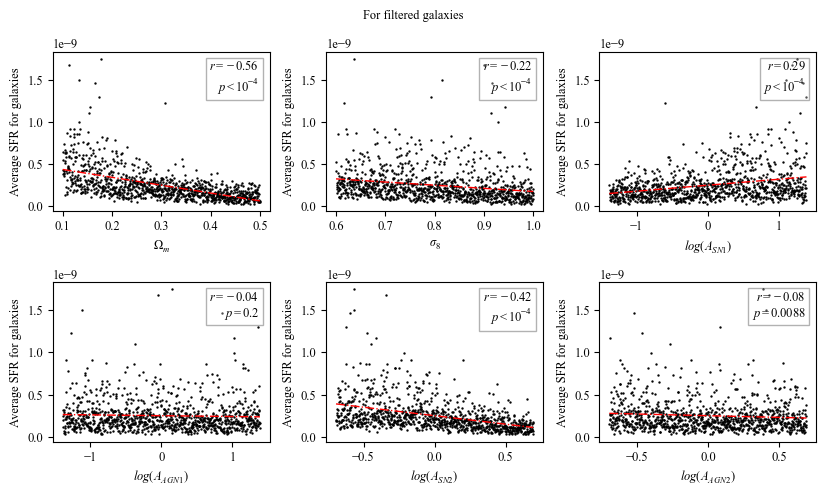

In [292]:
simpars = ['\Omega_m','\sigma_8','log(A_{SN1})','log(A_{AGN1})','log(A_{SN2})','log(A_{AGN2})']
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))
axes = axes.flatten()
fig.suptitle('For filtered galaxies')
for i, param in enumerate(range(6)):
    ax = axes[i]
    
    slope, intercept = np.polyfit(label_table[:,param], mean_SSFR, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    pearson_coeff, p_value = pearsonr(label_table[:,param], mean_SSFR)
    

    ax.scatter(label_table[:,param], mean_SSFR, c='k', s=0.5)
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.set_xlabel(f'${simpars[param]}$')
    ax.set_ylabel(f'Average SFR for galaxies')


plt.tight_layout() 

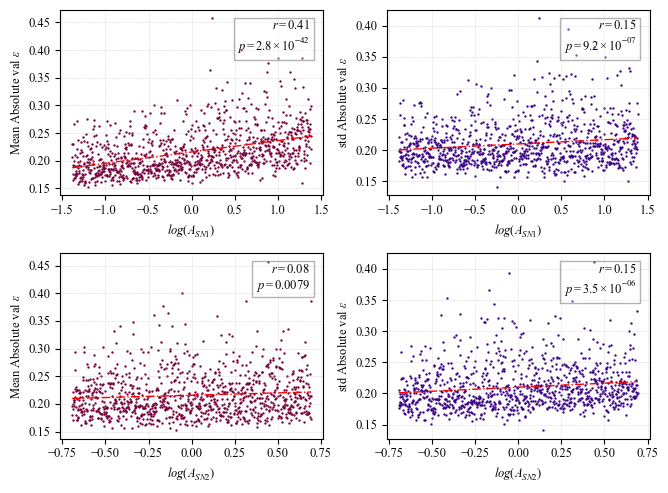

In [73]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20/3,5))
axes = ax.flatten()
for axis in axes:
    axis.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
      
axes[0].scatter(label_table[:,2], mean_e, c='xkcd:merlot', s=0.5)
slope, intercept = np.polyfit(label_table[:,2], mean_e, 1)
x_vals = np.linspace(min(lims[2]), max(lims[2]), 10)
y_vals = slope * x_vals + intercept
axes[0].plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

pearson_coeff, p_value = pearsonr(label_table[:,2], mean_e)
if p_value:
    axes[0].text( 0.95, 0.95, 
    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
    transform=axes[0].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
else:
    axes[0].text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=axes[0].transAxes, 
    fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
axes[0].set_xlabel(f'${simpars[2]}$')
axes[0].set_ylabel(r'Mean Absolute val $\epsilon$')
axes[1].scatter(label_table[:,2], std_e, c='xkcd:indigo', s=0.5)
slope, intercept = np.polyfit(label_table[:,2], std_e, 1)
x_vals = np.linspace(min(lims[2]), max(lims[2]), 10)
y_vals = slope * x_vals + intercept
axes[1].plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

pearson_coeff, p_value = pearsonr(label_table[:,2], std_e)
if p_value:
    axes[1].text( 0.95, 0.95, 
    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
    transform=axes[1].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
else:
    axes[1].text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=axes[1].transAxes, 
    fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))

axes[1].set_ylabel(r'std Absolute val $\epsilon$')
axes[1].set_xlabel(f'${simpars[2]}$')
axes[2].scatter(label_table[:,4], mean_e, c='xkcd:merlot', s=0.5)
slope, intercept = np.polyfit(label_table[:,4], mean_e, 1)
x_vals = np.linspace(min(lims[4]), max(lims[4]), 10)
y_vals = slope * x_vals + intercept
axes[2].plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

pearson_coeff, p_value = pearsonr(label_table[:,4], mean_e)
if p_value:
    axes[2].text( 0.95, 0.95, 
    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
    transform=axes[2].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
else:
    axes[2].text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=axes[2].transAxes, 
    fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))

axes[2].set_ylabel(r'Mean Absolute val $\epsilon$')
axes[2].set_xlabel(f'${simpars[4]}$')
axes[3].scatter(label_table[:,4], std_e, c='xkcd:indigo', s=0.5)
slope, intercept = np.polyfit(label_table[:,4], std_e, 1)
x_vals = np.linspace(min(lims[4]), max(lims[4]), 10)
y_vals = slope * x_vals + intercept
axes[3].plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

pearson_coeff, p_value = pearsonr(label_table[:,4], std_e)
if p_value:
    axes[3].text( 0.95, 0.95, 
    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
    transform=axes[3].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
else:
    axes[3].text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=axes[3].transAxes, 
    fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))

axes[3].set_ylabel(r'std Absolute val $\epsilon$')
axes[3].set_xlabel(f'${simpars[4]}$')
plt.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/ell vs params.pdf', dpi=300)
plt.show()

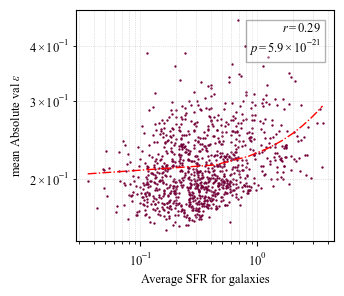

In [243]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10/3,3))
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

ax.scatter(mean_SFR, mean_e, c='xkcd:merlot', s=0.5)
slope, intercept = np.polyfit(mean_SFR, mean_e, 1)
x_vals = np.linspace(min(mean_SFR), max(mean_SFR), 10)
y_vals = slope * x_vals + intercept
ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

pearson_coeff, p_value = pearsonr(mean_SFR, mean_e)
if p_value:
    ax.text( 0.95, 0.95, 
    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
    transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    
    
ax.set_ylabel(r'mean Absolute val $\epsilon$')
ax.set_xlabel(f'Average SFR for galaxies')
# ax.set_xscale('log')
# ax.set_yscale('log')

ValueError: x and y must be the same size

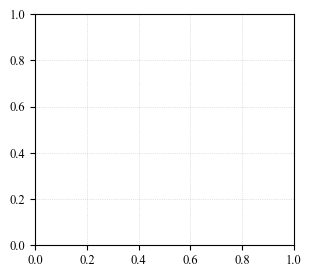

In [175]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10/3,3))
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

ax.scatter(std_SFR, mean_e, c='xkcd:merlot', s=0.5)
slope, intercept = np.polyfit(std_SFR, mean_e, 1)
x_vals = np.linspace(min(mean_SFR), max(mean_SFR), 10)
y_vals = slope * x_vals + intercept
ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

pearson_coeff, p_value = pearsonr(std_SFR, mean_e)
if p_value:
    ax.text( 0.95, 0.95, 
    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
    transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    
    
ax.set_ylabel(r'std Absolute val $\epsilon$')
ax.set_xlabel(f'Average SFR for galaxies')
# ax.set_xscale('log')
# ax.set_yscale('log')

In [177]:
mean_SFR.shape

(1000,)

Text(0.5, 0, 'Average log(SFR) for galaxies')

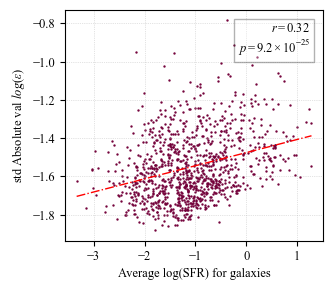

In [169]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10/3,3))
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

ax.scatter(np.log(mean_SFR), np.log(mean_e), c='xkcd:merlot', s=0.5)
slope, intercept = np.polyfit(np.log(mean_SFR), np.log(mean_e), 1)
x_vals = np.linspace(min(np.log(mean_SFR)), max(np.log(mean_SFR)), 10)
y_vals = slope * x_vals + intercept
ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

pearson_coeff, p_value = pearsonr(np.log(mean_SFR), np.log(mean_e))
if p_value:
    ax.text( 0.95, 0.95, 
    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
    transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    
    
ax.set_ylabel(r'mean Absolute val $log(\epsilon)$')
ax.set_xlabel(f'Average log(SFR) for galaxies')

#### Rescaling ellipticities to account for SFR

Text(0.5, 0, 'Average SFR for galaxies')

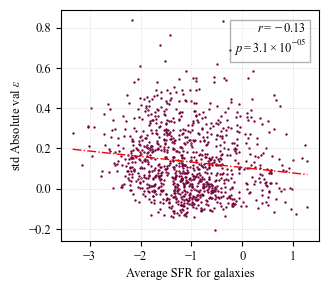

In [174]:
weighted_e = np.log(mean_e) - (slope * np.log(mean_SFR) + intercept)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10/3,3))
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

ax.scatter(np.log(mean_SFR), weighted_e, c='xkcd:merlot', s=0.5)
slope, intercept = np.polyfit(np.log(mean_SFR), weighted_e, 1)
x_vals = np.linspace(min(np.log(mean_SFR)), max(np.log(mean_SFR)), 10)
y_vals = slope * x_vals + intercept
ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")

pearson_coeff, p_value = pearsonr(np.log(mean_SFR), weighted_e)
if p_value:
    ax.text( 0.95, 0.95, 
    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
    transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    
    
ax.set_ylabel(r'mean log Absolute val $\epsilon$')
ax.set_xlabel(f'Average log(SFR) for galaxies')
# ax.set_xscale('log')
# ax.set_yscale('log')

In [ ]:
SF = np.where(filt_SFR!=0)[0]
print(len(SF)/len(filt_SFR))
NSF = np.where(filt_SFR==0)[0]

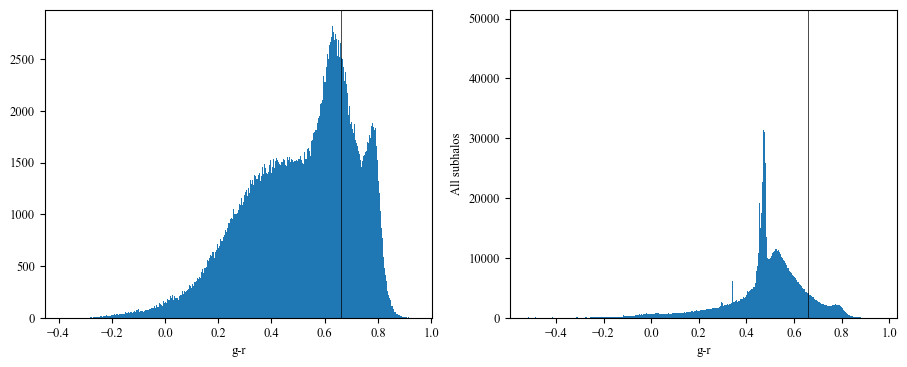

In [209]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(33/3,4))
ax[0].hist(filt_g_r,bins=1000)
ax[0].axvline(0.66,c='k',lw=0.5)
ax[0].set_xlabel('g-r')
ax[1].hist(all_g_r[all_g_r!=0],bins=1000)
ax[1].axvline(0.66,c='k',lw=0.5)
ax[1].set_xlabel('g-r')
ax[1].set_ylabel('All subhalos')
# ax[0].set_xscale('log')
plt.show()

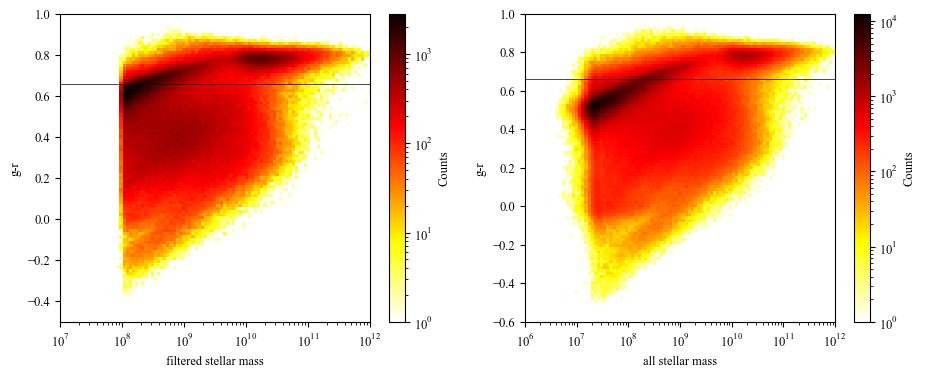

In [295]:
import matplotlib as mpl
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(33/3,4))
# ax[0].scatter(filt_M_R_12, filt_g_r, s=0.01)
h = ax[0].hist2d(filt_M_R_12, filt_g_r, bins=(np.logspace(7,12,100),np.linspace(-0.5,1,100)), norm=mpl.colors.LogNorm(), cmap='hot_r')
ax[0].axhline(0.66,c='k',lw=0.5)
ax[0].set_xscale('log')
ax[0].set_ylabel('g-r')
ax[0].set_xlabel('filtered stellar mass')
cbar = fig.colorbar(h[3], ax=ax[0])
cbar.set_label("Counts")

h = ax[1].hist2d(all_M_R_12, all_g_r, bins=(np.logspace(6,12,100),np.linspace(-0.6,1,100)), norm=mpl.colors.LogNorm(), cmap='hot_r')
# ax[1].scatter(all_M_R_12, all_g_r, s=0.01)
ax[1].axhline(0.66,c='k',lw=0.5)
ax[1].set_xscale('log')
ax[1].set_ylabel('g-r')
ax[1].set_xlabel('all stellar mass')
cbar = fig.colorbar(h[3], ax=ax[1])
cbar.set_label("Counts")


In [289]:
sum((all_SFR/all_M_R_12)<10**-10.)/len(all_SFR)

/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_2224/1022603707.py:1: RuntimeWarning: divide by zero encountered in divide
  sum((all_SFR/all_M_R_12)<10**-10.)/len(all_SFR)
/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_2224/1022603707.py:1: RuntimeWarning: invalid value encountered in divide
  sum((all_SFR/all_M_R_12)<10**-10.)/len(all_SFR)


0.06737665605094975

/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_2224/3320755237.py:14: RuntimeWarning: divide by zero encountered in divide
  h = ax[1].hist2d(all_M_R_12, all_SFR/all_M_R_12, bins=(np.logspace(7,12,100), np.logspace(-15,-7,100)), norm=mpl.colors.LogNorm(), cmap='bone_r')
/var/folders/2k/4lvm79j14sg5_v8dqx8tly7h0000gn/T/ipykernel_2224/3320755237.py:14: RuntimeWarning: invalid value encountered in divide
  h = ax[1].hist2d(all_M_R_12, all_SFR/all_M_R_12, bins=(np.logspace(7,12,100), np.logspace(-15,-7,100)), norm=mpl.colors.LogNorm(), cmap='bone_r')


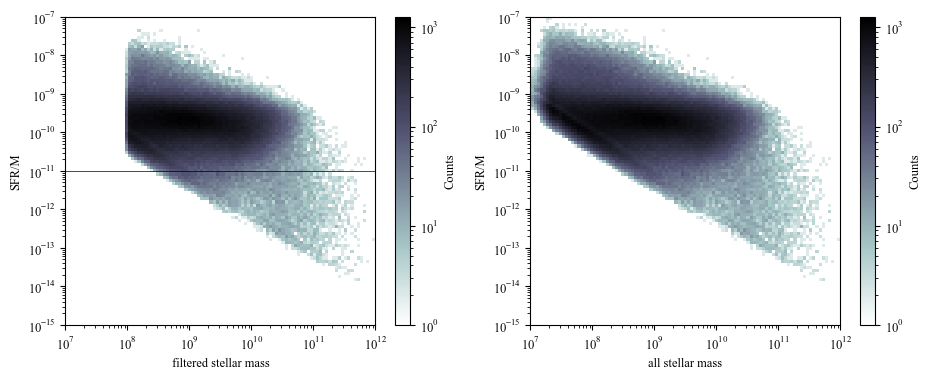

In [284]:
import matplotlib as mpl
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(33/3,4))
# ax[0].scatter(filt_M_R_12, filt_g_r, s=0.01)
h = ax[0].hist2d(filt_M_R_12, filt_SFR/filt_M_R_12, bins=(np.logspace(7,12,100), np.logspace(-15,-7,100)), norm=mpl.colors.LogNorm(), cmap='bone_r')
ax[0].axhline(0.66,c='k',lw=0.5)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('SFR/M')
ax[0].axhline(10**-11,c='k',lw=0.5)
ax[0].set_xlabel('filtered stellar mass')
cbar = fig.colorbar(h[3], ax=ax[0])
cbar.set_label("Counts")

h = ax[1].hist2d(all_M_R_12, all_SFR/all_M_R_12, bins=(np.logspace(7,12,100), np.logspace(-15,-7,100)), norm=mpl.colors.LogNorm(), cmap='bone_r')
# ax[1].scatter(all_M_R_12, all_g_r, s=0.01)
ax[1].axhline(0.66,c='k',lw=0.5)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel('SFR/M')
ax[1].set_xlabel('all stellar mass')
cbar = fig.colorbar(h[3], ax=ax[1])
cbar.set_label("Counts")

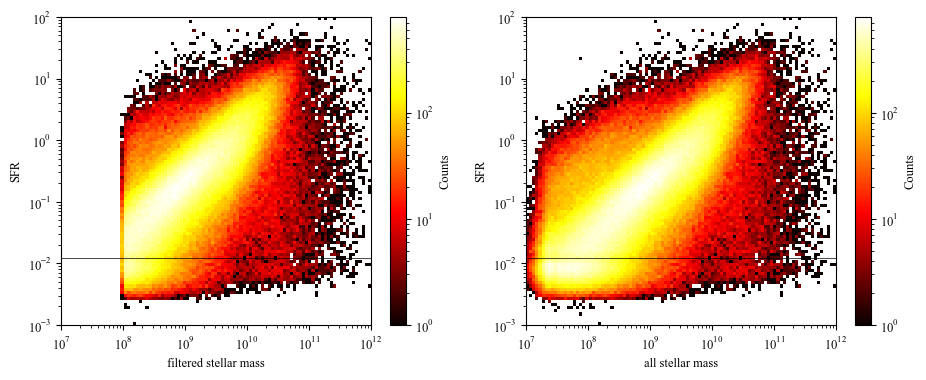

In [271]:
import matplotlib as mpl
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(33/3,4))
# ax[0].scatter(filt_M_R_12, filt_g_r, s=0.01)
h = ax[0].hist2d(filt_M_R_12, filt_SFR, bins=(np.logspace(7,12,100),np.logspace(-3,2,100)), norm=mpl.colors.LogNorm(), cmap='hot')
ax[0].axhline(0.012,c='k',lw=0.5)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('SFR')
ax[0].set_xlabel('filtered stellar mass')
cbar = fig.colorbar(h[3], ax=ax[0])
cbar.set_label("Counts")

h = ax[1].hist2d(all_M_R_12, all_SFR, bins=(np.logspace(7,12,100),np.logspace(-3,2,100)), norm=mpl.colors.LogNorm(), cmap='hot')
# ax[1].scatter(all_M_R_12, all_g_r, s=0.01)
ax[1].axhline(0.012,c='k',lw=0.5)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel('SFR')
ax[1].set_xlabel('all stellar mass')
cbar = fig.colorbar(h[3], ax=ax[1])
cbar.set_label("Counts")

In [5]:
SF_ = np.where(all_SFR!=0)[0]
print("Fraction of all Galaxies with SFR",len(SF_)/len(all_SFR))
NSF_ = np.where(all_SFR==0)[0]

SF = np.where(filt_SFR!=0)[0]
print("Fraction of my galaxies with SFR",len(SF)/len(filt_SFR))
NSF = np.where(filt_SFR==0)[0]

Fraction of all Galaxies with SFR 0.044639033337640285
Fraction of my galaxies with SFR 0.6166339114358445


Text(0, 0.5, 'n stars')

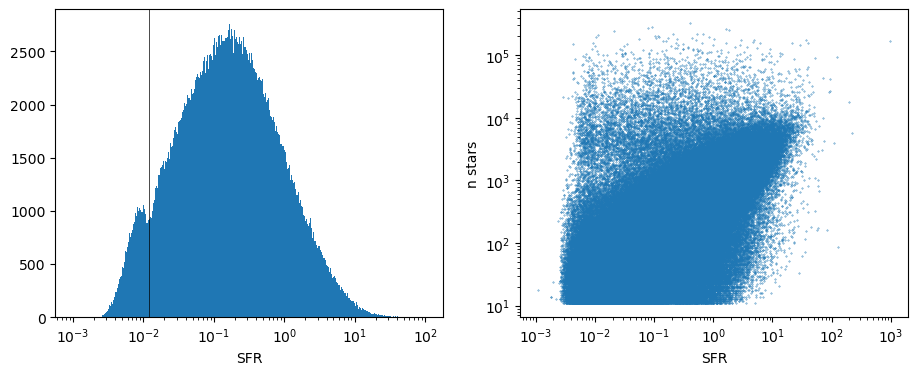

In [21]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(33/3,4))

ax[0].hist(filt_SFR[SF],bins=np.logspace(0-3,2,500))
ax[0].axvline(0.012,c='k',lw=0.5)
ax[0].set_xscale('log')
ax[0].set_xlabel('SFR')
ax[1].scatter(filt_SFR[SF], filt_nstar[SF] , s=0.1)
# plt.hist2d(all_SFR[filt] , all_M_R_12[filt],cmap='bone',bins=np.logspace(0-4,3,50))
ax[1].set_xscale('log'); ax[1].set_yscale('log')
# plt.xlim([-1,10])
plt.xlabel('SFR'); plt.ylabel('n stars')

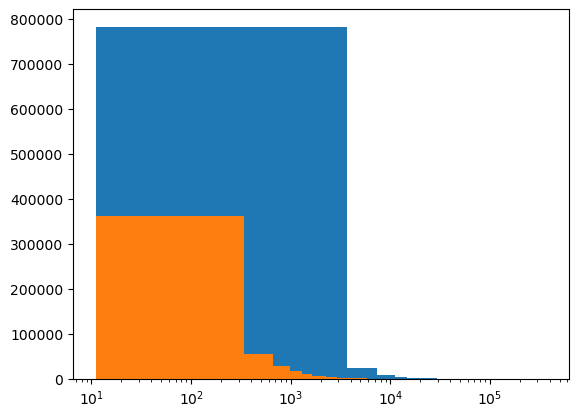

In [198]:
SF = np.where(filt_SFR!=0)[0]
NSF = np.where(filt_SFR==0)[0]
plt.hist(filt_nstar , bins=100)
plt.hist(filt_nstar[SF] , bins=1000)
plt.xscale('log')
plt.show()


In [78]:
print(len(filt_M_R_12), len(all_M_R_12),len(all_SFR), len(filt_M_R_12),len(all_nstar), len(filt_nstar) )

823787 16879689 16879689 823787 16879689 823787


Filter out 95.12% of subhalos. and 1 - 504388/748761 = 32.26% of subhalos with non-zero SFR

In [171]:
SF_ = np.where(all_SFR!=0)[0]
print(len(SF_)/len(all_SFR))
NSF_ = np.where(all_SFR==0)[0]

0.044639033337640285


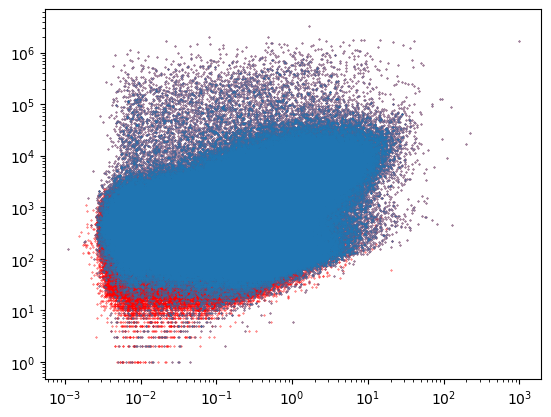

In [187]:
plt.scatter(all_SFR[SF_], all_gas[SF_] , s=0.1,c='red')
plt.scatter(filt_SFR[SF], filt_gas[SF] , s=0.1)
# plt.hist2d(all_SFR , all_gas,cmap='bone',bins=(np.logspace(1e-6,5,256),np.logspace(1e-6,2e6,256)))
plt.xscale('log'); plt.yscale('log')
# plt.xlim([-0.1,5]); plt.ylim([-1e5,2e6])

In [169]:
print(len(all_SFR),len(filt_SFR[SF]))

16879689 507975


In [87]:
# Function to convert Cartesian coordinates to spherical coordinates
def cart_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    # make it so z is parallel to line of sight of observer
    theta = np.arccos(x / r)
    phi = np.arctan2(y, z)
    return r, theta, phi

# Function to convert spherical coordinates to RA and DEC in degrees
def spherical_to_ra_dec(theta, phi):
    ra = np.degrees(phi)
    dec = 90 - np.degrees(theta)
    return ra, dec

### Making Spiral/Elliptical catalogues 

In [99]:
all_SFR = np.array([])
all_M_R_12 = np.array([])
all_nstar = np.array([])
all_gas = np.array([])
filt_SFR = np.array([])
filt_M_R_12 = np.array([])
filt_nstar = np.array([])
filt_gas = np.array([])
for filenum in range(0,1000):
    CAT = f'/Volumes/CAMELSDrive/Illustris_SUBFIND/LH{filenum}_SUBFIND.hdf5'
    # open 
    f = h5py.File(CAT, 'r')

    pos_sh  = f['Subhalo/SubhaloPos'][:]/1e3     #positions of SUBFIND subhalos in Mpc/h
    SFR_sh = f['Subhalo/SubhaloSFR'][:]
#     subh_M_R_12 = f['Subhalo/SubhaloMassInRadType'][:,4]*1e10
#     nstar_sh = f['Subhalo/SubhaloLenType'][:,4]
#     ngas_sh = f['Subhalo/SubhaloLenType'][:,0]
    # close file
    f.close()

    fits_file_path = f'LH_ellipticities/CAMELS_data_LHy{filenum}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data

    pos_sh = np.array([pos_sh[:,2],pos_sh[:,0],pos_sh[:,1]]).T # Axis change
    # Now you can use the same variable names
    pos_g = np.array([data['x'], data['y'], data['z']]).T
    ias = np.array([data['ia_1'], data['ia_2']]).T

    indices = np.where((pos_sh[:, None] == pos_g).all(axis=2).any(axis=1))[0]
    consistent = pos_g.shape[0]==indices.shape[0]
#     print(indices.shape[0],"=",pos_g.shape[0]," ",consistent)
    # filter out elliptical
    if consistent:

        non_zero = SFR_sh[indices] > -10 #!=0

        nz_pos = pos_g[non_zero]
        nz_shape = ias[non_zero]
        nz_SFR = (SFR_sh[indices])[non_zero]

        split = 0.012
        elliptical = nz_SFR<=split
        spiral = nz_SFR>split
        
        ell_pos = nz_pos[elliptical]
        ell_shapes = nz_shape[elliptical]
        
        spi_pos = nz_pos[spiral]
        spi_shapes = nz_shape[spiral]

        print(spi_shapes.shape, ell_shapes.shape)
        
        ################## SPIRALS
        
        x = spi_pos[:,0]
        y = spi_pos[:,1]
        z = spi_pos[:,2]
        ia_1 = spi_shapes[:,0]
        ia_2 = spi_shapes[:,1]


        z+= 10000

        r, theta, phi = cart_to_spherical(x, y, z)
        ra, dec = spherical_to_ra_dec(theta, phi)
        
        # Create a FITS table
        data = fits.BinTableHDU.from_columns([
            fits.Column(name='RA', format='D', array=ra),
            fits.Column(name='DEC', format='D', array=dec),
            fits.Column(name='r_col', format='D', array=r),
            fits.Column(name='ia_1', format='D', array=ia_1),
            fits.Column(name='ia_2', format='D', array=ia_2),
        ])

        primary_hdu = fits.PrimaryHDU()
        hdul = fits.HDUList([primary_hdu, data])

        # Save the FITS file
        hdul.writeto(f'../correlating-folder/LH_ellipticities_RADEC_spirals/CAMELS_proj_data_LHy{filenum}.fits', overwrite=True)
        
        x_rand, y_rand, z_rand = np.random.uniform(0, 25, (3,len(x)))
        ia_1_rand, ia_2_rand = np.random.normal(loc=0, scale=0.14, size=(2,len(x)))
        
        z_rand += 10000

        r_rand, theta, phi = cart_to_spherical(x_rand, y_rand, z_rand)
        ra_rand, dec_rand = spherical_to_ra_dec(theta, phi)
        
        # Create a FITS table
        data = fits.BinTableHDU.from_columns([
            fits.Column(name='RA', format='D', array=ra_rand),
            fits.Column(name='DEC', format='D', array=dec_rand),
            fits.Column(name='r_col', format='D', array=r_rand),
            fits.Column(name='ia_1', format='D', array=ia_1_rand),
            fits.Column(name='ia_2', format='D', array=ia_2_rand),
        ])

        # Create a Primary HDU
        primary_hdu = fits.PrimaryHDU()
        hdul = fits.HDUList([primary_hdu, data])

        # Save the FITS file
        hdul.writeto(f'../correlating-folder/LH_ellipticities_RADEC_spirals/CAMELS_proj_rand_LHy{filenum}.fits', overwrite=True)
        
        ################ ELLIPTICALS
                
        x = ell_pos[:,0]
        y = ell_pos[:,1]
        z = ell_pos[:,2]
        ia_1 = ell_shapes[:,0]
        ia_2 = ell_shapes[:,1]


        z+= 10000
        r, theta, phi = cart_to_spherical(x, y, z)
        ra, dec = spherical_to_ra_dec(theta, phi)
        

        data = fits.BinTableHDU.from_columns([
            fits.Column(name='RA', format='D', array=ra),
            fits.Column(name='DEC', format='D', array=dec),
            fits.Column(name='r_col', format='D', array=r),
            fits.Column(name='ia_1', format='D', array=ia_1),
            fits.Column(name='ia_2', format='D', array=ia_2),
        ])

        primary_hdu = fits.PrimaryHDU()
        hdul = fits.HDUList([primary_hdu, data])

        # Save the FITS file
        hdul.writeto(f'../correlating-folder/LH_ellipticities_RADEC_ellipticals/CAMELS_proj_data_LHy{filenum}.fits', overwrite=True)
        
        x_rand, y_rand, z_rand = np.random.uniform(0, 25, (3,len(x)))
        ia_1_rand, ia_2_rand = np.random.normal(loc=0, scale=0.14, size=(2,len(x)))
        
        z_rand += 10000
        r_rand, theta, phi = cart_to_spherical(x_rand, y_rand, z_rand)
        ra_rand, dec_rand = spherical_to_ra_dec(theta, phi)
        
        # Create a FITS table
        data = fits.BinTableHDU.from_columns([
            fits.Column(name='RA', format='D', array=ra_rand),
            fits.Column(name='DEC', format='D', array=dec_rand),
            fits.Column(name='r_col', format='D', array=r_rand),
            fits.Column(name='ia_1', format='D', array=ia_1_rand),
            fits.Column(name='ia_2', format='D', array=ia_2_rand),
        ])

        primary_hdu = fits.PrimaryHDU()
        hdul = fits.HDUList([primary_hdu, data])

        # Save the FITS file
        hdul.writeto(f'../correlating-folder/LH_ellipticities_RADEC_ellipticals/CAMELS_proj_rand_LHy{filenum}.fits', overwrite=True)
        

    else:
        print('Not consistent')
        break


(299, 2) (110, 2)
(222, 2) (126, 2)
(421, 2) (749, 2)
(307, 2) (42, 2)
(285, 2) (73, 2)
(328, 2) (155, 2)
(281, 2) (236, 2)
(430, 2) (267, 2)
(513, 2) (1274, 2)
(794, 2) (724, 2)
(429, 2) (1103, 2)
(119, 2) (265, 2)
(263, 2) (358, 2)
(581, 2) (717, 2)
(295, 2) (81, 2)
(484, 2) (188, 2)
(278, 2) (119, 2)
(118, 2) (20, 2)
(203, 2) (39, 2)
(513, 2) (270, 2)
(674, 2) (463, 2)
(699, 2) (976, 2)
(465, 2) (193, 2)
(336, 2) (149, 2)
(660, 2) (304, 2)
(274, 2) (108, 2)
(329, 2) (325, 2)
(575, 2) (283, 2)
(754, 2) (1036, 2)
(513, 2) (208, 2)
(244, 2) (108, 2)
(116, 2) (299, 2)
(576, 2) (1063, 2)
(285, 2) (72, 2)
(248, 2) (505, 2)
(588, 2) (603, 2)
(483, 2) (214, 2)
(223, 2) (286, 2)
(321, 2) (162, 2)
(206, 2) (74, 2)
(167, 2) (88, 2)
(446, 2) (954, 2)
(353, 2) (146, 2)
(117, 2) (24, 2)
(324, 2) (62, 2)
(241, 2) (81, 2)
(388, 2) (320, 2)
(654, 2) (383, 2)
(535, 2) (762, 2)
(481, 2) (348, 2)
(656, 2) (607, 2)
(186, 2) (32, 2)
(182, 2) (96, 2)
(587, 2) (316, 2)
(692, 2) (234, 2)
(669, 2) (271, 2)
(

(602, 2) (176, 2)
(362, 2) (83, 2)
(439, 2) (661, 2)
(599, 2) (432, 2)
(244, 2) (142, 2)
(456, 2) (169, 2)
(256, 2) (145, 2)
(518, 2) (574, 2)
(707, 2) (182, 2)
(365, 2) (77, 2)
(363, 2) (146, 2)
(379, 2) (156, 2)
(441, 2) (1187, 2)
(641, 2) (299, 2)
(546, 2) (141, 2)
(687, 2) (690, 2)
(650, 2) (913, 2)
(570, 2) (314, 2)
(141, 2) (56, 2)
(197, 2) (118, 2)
(223, 2) (811, 2)
(681, 2) (800, 2)
(460, 2) (116, 2)
(764, 2) (314, 2)
(653, 2) (517, 2)
(825, 2) (194, 2)
(535, 2) (287, 2)
(583, 2) (209, 2)
(571, 2) (393, 2)
(719, 2) (806, 2)
(463, 2) (125, 2)
(653, 2) (572, 2)
(693, 2) (709, 2)
(459, 2) (178, 2)
(470, 2) (442, 2)
(313, 2) (40, 2)
(297, 2) (29, 2)
(235, 2) (119, 2)
(839, 2) (1071, 2)
(267, 2) (82, 2)
(324, 2) (91, 2)
(460, 2) (1321, 2)
(334, 2) (77, 2)
(324, 2) (171, 2)
(75, 2) (103, 2)
(654, 2) (629, 2)
(178, 2) (32, 2)
(219, 2) (32, 2)
(925, 2) (497, 2)
(376, 2) (163, 2)
(219, 2) (247, 2)
(393, 2) (85, 2)
(390, 2) (43, 2)
(476, 2) (182, 2)
(292, 2) (87, 2)
(376, 2) (84, 2)
(667

(656, 2) (317, 2)
(387, 2) (50, 2)
(233, 2) (118, 2)
(429, 2) (573, 2)
(441, 2) (264, 2)
(540, 2) (484, 2)
(296, 2) (62, 2)
(753, 2) (577, 2)
(376, 2) (449, 2)
(414, 2) (260, 2)
(215, 2) (75, 2)
(596, 2) (300, 2)
(382, 2) (294, 2)
(277, 2) (139, 2)
(387, 2) (209, 2)
(729, 2) (848, 2)
(867, 2) (217, 2)
(347, 2) (145, 2)
(279, 2) (62, 2)
(500, 2) (226, 2)
(382, 2) (620, 2)
(349, 2) (102, 2)
(373, 2) (132, 2)
(873, 2) (995, 2)
(514, 2) (142, 2)
(396, 2) (173, 2)
(769, 2) (264, 2)
(456, 2) (574, 2)
(260, 2) (66, 2)
(483, 2) (149, 2)
(331, 2) (134, 2)
(624, 2) (911, 2)
(569, 2) (474, 2)
(389, 2) (364, 2)
(195, 2) (45, 2)
(658, 2) (1394, 2)
(275, 2) (119, 2)
(496, 2) (211, 2)
(427, 2) (1109, 2)
(828, 2) (403, 2)
(532, 2) (137, 2)
(346, 2) (84, 2)
(357, 2) (124, 2)
(613, 2) (427, 2)
(288, 2) (49, 2)
(519, 2) (474, 2)
(452, 2) (151, 2)
(574, 2) (483, 2)
(422, 2) (172, 2)
(598, 2) (548, 2)
(330, 2) (69, 2)
(135, 2) (91, 2)
(338, 2) (154, 2)
(604, 2) (523, 2)
(508, 2) (184, 2)
(250, 2) (189, 2)
